In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<Figure size 640x480 with 0 Axes>

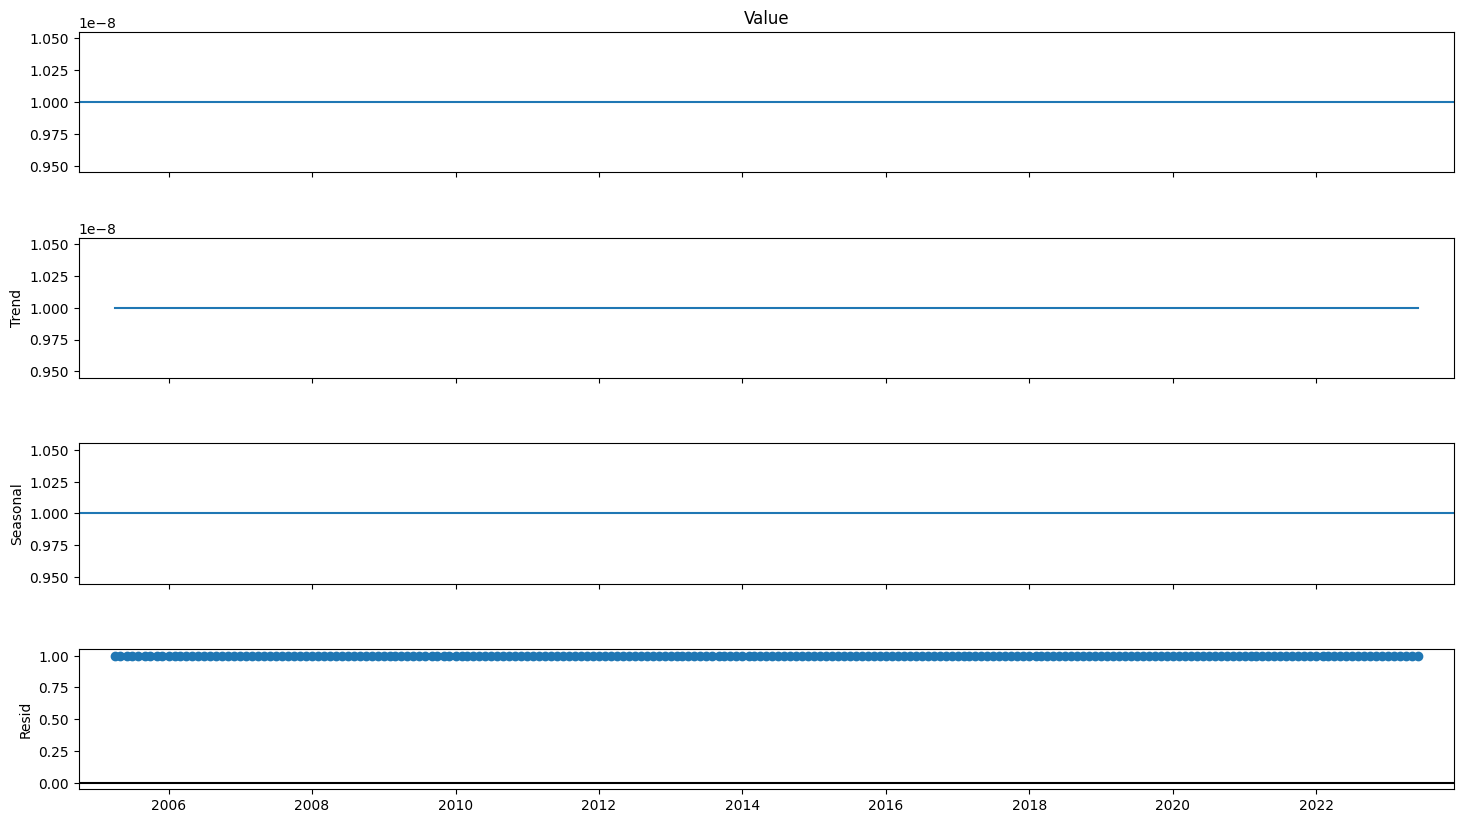

d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.05 sec
Total fit time: 0.054 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.02 sec
Total fit time: 0.021 seconds


<Figure size 640x480 with 0 Axes>

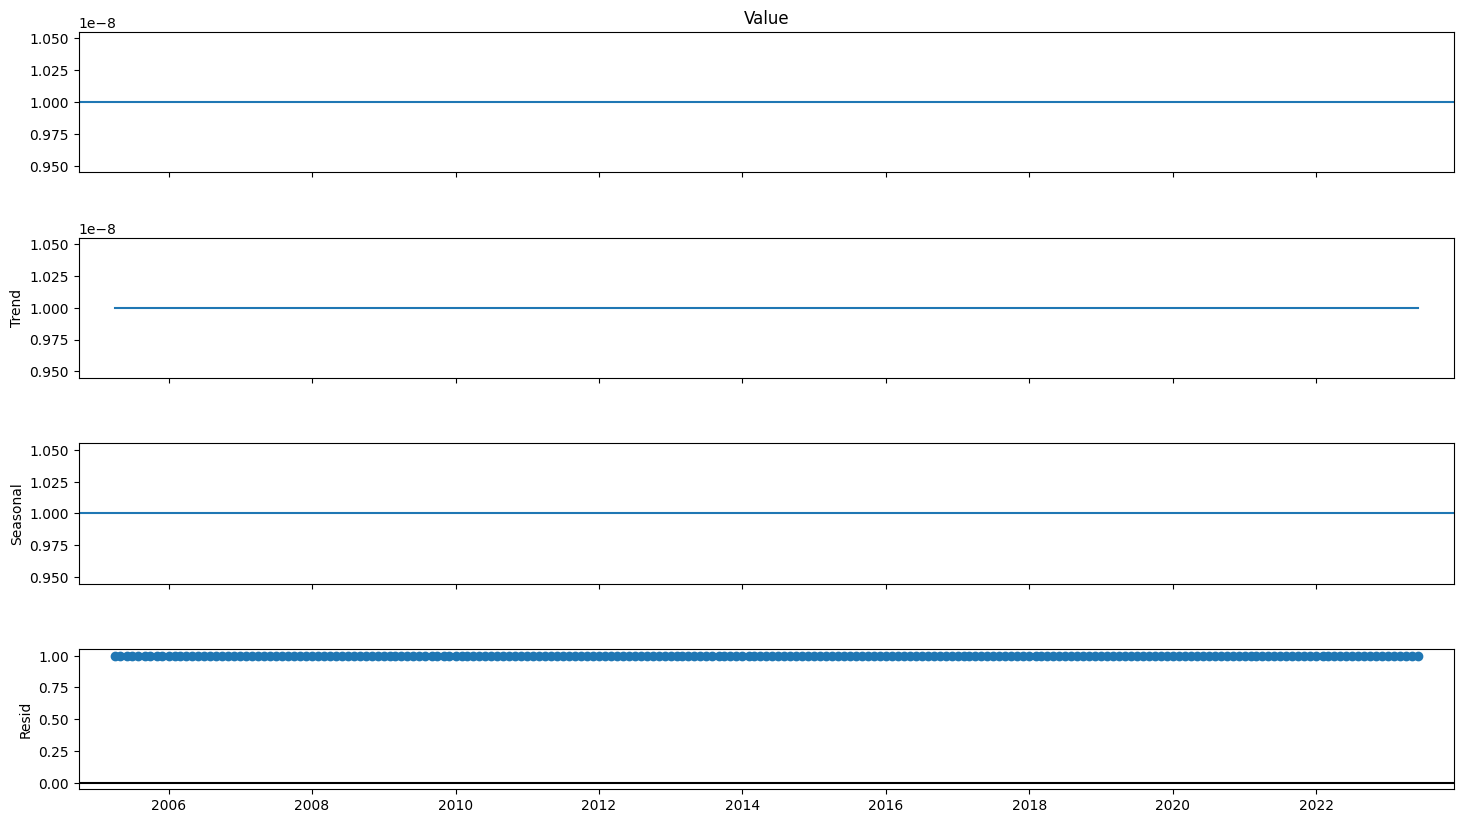

d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.02 sec
Total fit time: 0.022 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.02 sec
Total fit time: 0.023 seconds


<Figure size 640x480 with 0 Axes>

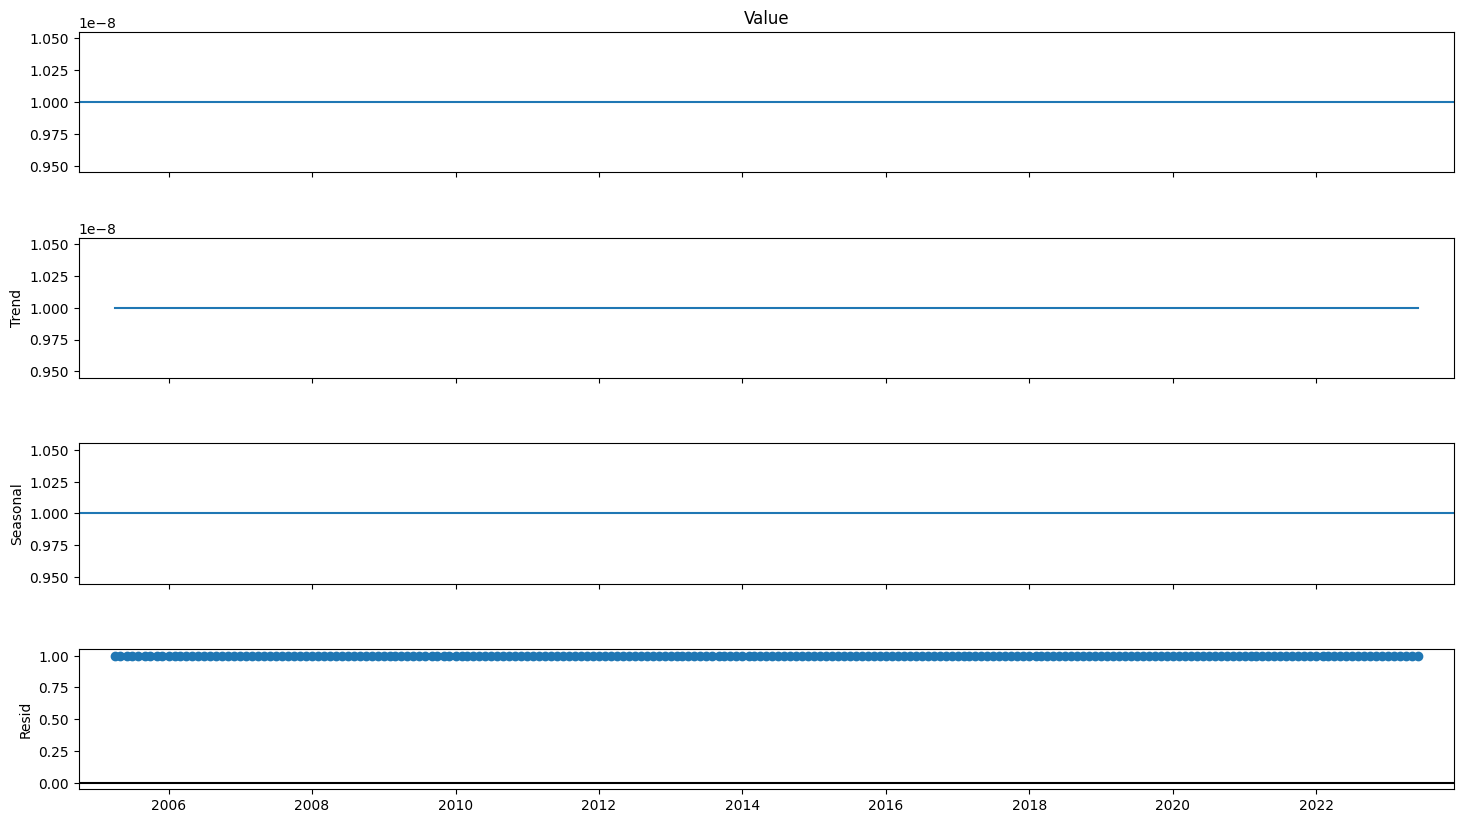

d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.02 sec
Total fit time: 0.019 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.02 sec
Total fit time: 0.025 seconds


<Figure size 640x480 with 0 Axes>

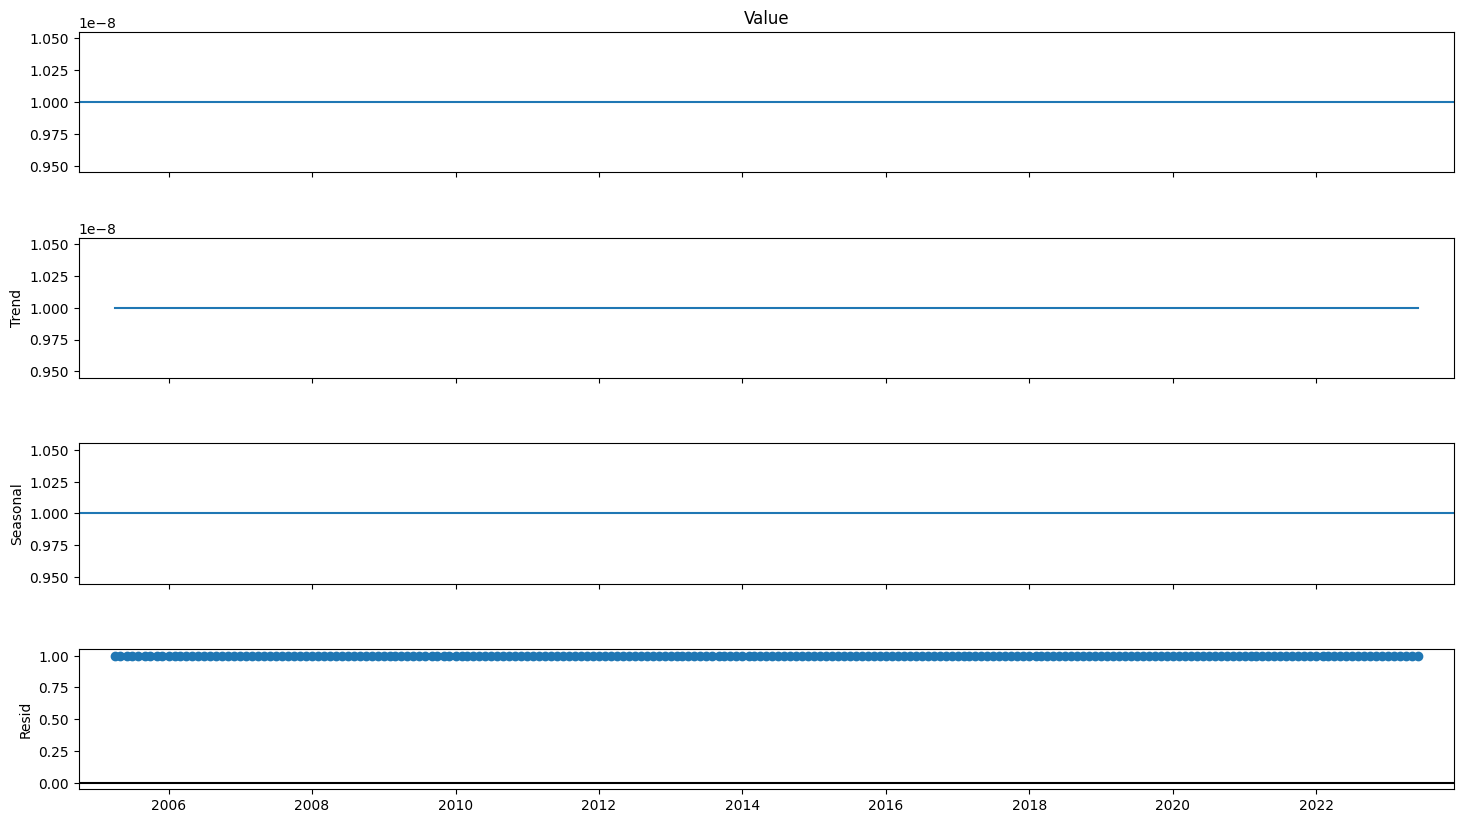

d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.02 sec
Total fit time: 0.021 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.03 sec
Total fit time: 0.025 seconds


<Figure size 640x480 with 0 Axes>

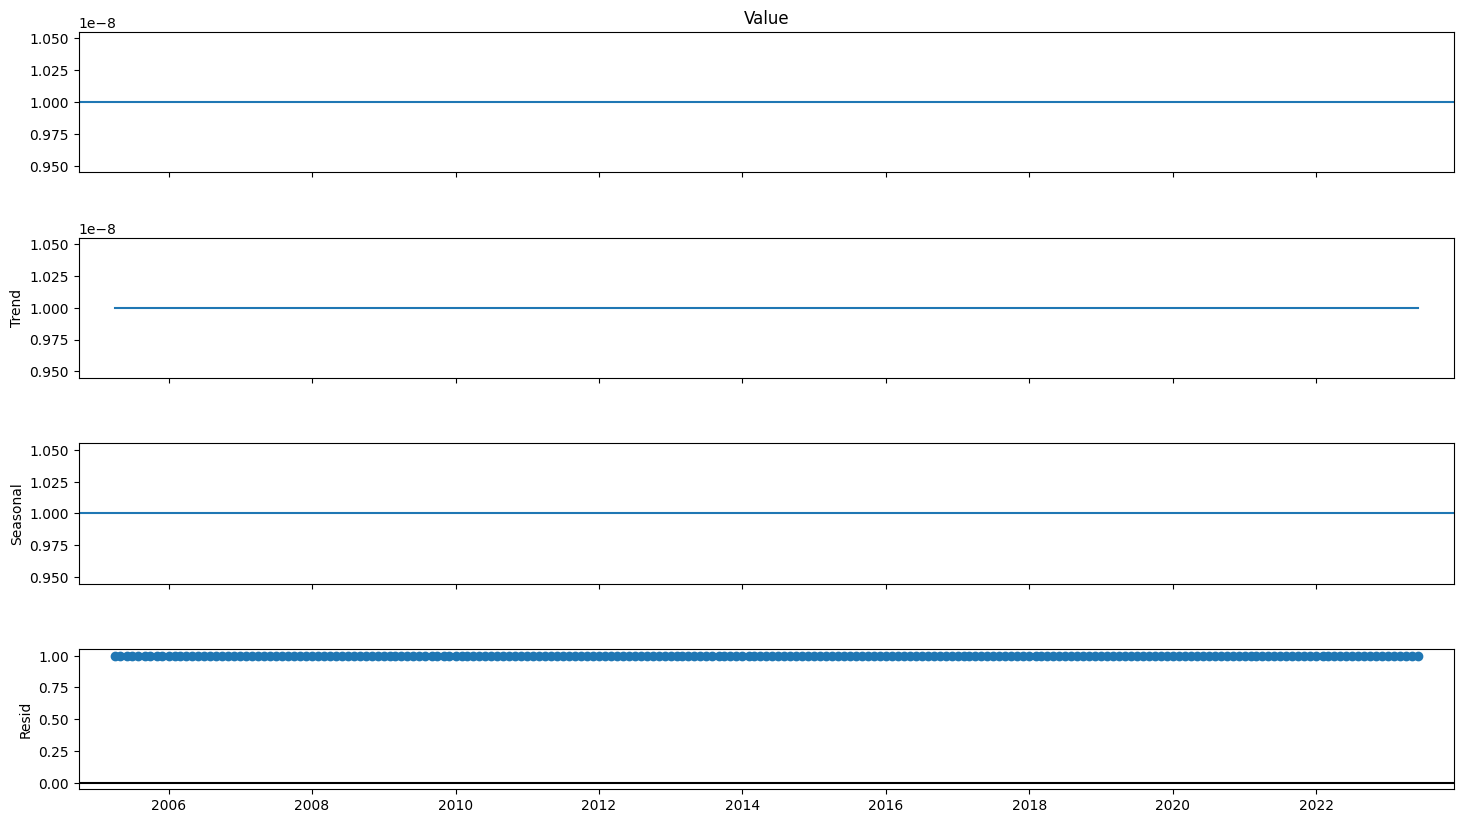

d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
d:\Github\Environment-pollition-study\venv\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.02 sec
Total fit time: 0.024 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3663.519, Time=0.03 sec
Total fit time: 0.026 seconds
   row_index  R-squared_ARIMA  R-squared_SARIMA
0          0    -3.653754e+31     -3.653754e+31
1          1    -3.653754e+31     -3.653754e+31
2          2    -3.653754e+31     -3.653754e+31
3          3    -3.653754e+31     -3.653754e+31
4          4    -3.653754e+31     -3.653754e+31


In [2]:
df_m = pd.read_csv('df_m.csv')
results = []
i = 0
for idx, series_data in df_m.iterrows():
    df = pd.DataFrame({'Value': series_data})
    df.index = pd.to_datetime(df.index, format='%Y%m')    
    df['Value'] += 0.00000001
    if df['Value'].min() == df['Value'].max() and i < 20 :
        i += 1
        result = seasonal_decompose(df['Value'], model='multiplicative', period=12)
        fig = plt.figure()
        fig = result.plot()
        fig.set_size_inches(16, 9)
        plt.show()
        test_size = 0.15
        valid_size = 0.10
        test_split_idx = int(df.shape[0] * (1 - test_size))
        valid_split_idx = int(df.shape[0] * (1 - (valid_size + test_size)))
        
        train_df = df.iloc[:valid_split_idx].copy()
        valid_df = df.iloc[valid_split_idx:test_split_idx].copy()
        test_df = df.iloc[test_split_idx:].copy()
        
        y_train = train_df['Value']
        y_valid = valid_df['Value']
        y_test = test_df['Value']
        arima_model = auto_arima(y_train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
        sarima_model = auto_arima(y_train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
        y_test_pred_arima = arima_model.predict(n_periods=len(y_test))
        y_test_pred_sarima = sarima_model.predict(n_periods=len(y_test))
        
        mae_arima = mean_absolute_error(y_test, y_test_pred_arima)
        mse_arima = mean_squared_error(y_test, y_test_pred_arima)
        rmse_arima = np.sqrt(mse_arima)
        r2_arima = r2_score(y_test, y_test_pred_arima)
        
        mae_sarima = mean_absolute_error(y_test, y_test_pred_sarima)
        mse_sarima = mean_squared_error(y_test, y_test_pred_sarima)
        rmse_sarima = np.sqrt(mse_sarima)
        r2_sarima = r2_score(y_test, y_test_pred_sarima)
        
        results.append({
            'row_index': idx,
            'R-squared_ARIMA': r2_arima,
            'R-squared_SARIMA': r2_sarima
        })

results_df = pd.DataFrame(results)
print(results_df)

results_df.to_csv('pollution_model_results_arima_sarima.csv', index=False)
